<a href="https://colab.research.google.com/github/ganesh1616/Ganesh_INFO5731_Fall2024/blob/main/Ganesh_Marada_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
# Import necessary libraries
import numpy as np
import pandas as pd
import warnings
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import nltk
from nltk.corpus import stopwords



In [2]:
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [3]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Load dataset
url = 'https://raw.githubusercontent.com/ganesh1616/Ganesh_INFO5731_Fall2024/main/movie_reviews.csv'
df = pd.read_csv(url)
reviews = df.iloc[:, 1]  # Extract the text column

df.head()

,Review,Sentiment
0,You'll have to have your wits about you and yo...,Positive
1,One of the most anticipated films of the year ...,Positive
2,I'm a big fan of Nolan's work so was really lo...,Positive
3,I'm still collecting my thoughts after experie...,Positive
4,"""Oppenheimer"" is a biographical thriller film ...",Positive


In [5]:
# Convert sentences to words (tokenization)
def tokenize_sentences(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

In [6]:
# Tokenize the reviews
tokenized_reviews = list(tokenize_sentences(reviews))

In [7]:
# Build bigram and trigram models
bigram = gensim.models.Phrases(tokenized_reviews, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[tokenized_reviews], threshold=100)

In [8]:
# Convert bigram/trigram models into Phrasers for faster processing
bigram_model = gensim.models.phrases.Phraser(bigram)
trigram_model = gensim.models.phrases.Phraser(trigram)

In [9]:
# Example output for bigrams/trigrams
print(trigram_model[bigram_model[tokenized_reviews[0]]])

['positive']


In [10]:
# Functions for processing text
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def apply_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

def apply_trigrams(texts):
    return [trigram_model[bigram_model[doc]] for doc in texts]

def lemmatize_texts(texts, allowed_pos=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Lemmatize texts using spaCy."""
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    lemmatized = []
    for sentence in texts:
        doc = nlp(" ".join(sentence))
        lemmatized.append([token.lemma_ for token in doc if token.pos_ in allowed_pos])
    return lemmatized

In [11]:
# Process text data
processed_reviews = remove_stopwords(tokenized_reviews)
bigram_reviews = apply_bigrams(processed_reviews)
lemmatized_reviews = lemmatize_texts(bigram_reviews)


In [12]:
print(lemmatized_reviews[:1])

[['positive']]


In [13]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(lemmatized_reviews)
corpus = [dictionary.doc2bow(text) for text in lemmatized_reviews]

In [14]:

# Display corpus in human-readable format
print([[(dictionary[id], freq) for id, freq in doc] for doc in corpus[:1]])

[[('positive', 1)]]


In [15]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=42,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

In [16]:
# Print the top 10 topics
topics = lda_model.print_topics()
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")

Topic 1: (0, '0.333*"positive" + 0.333*"neutral" + 0.333*"negative"')
Topic 2: (1, '0.333*"negative" + 0.333*"neutral" + 0.333*"positive"')
Topic 3: (2, '0.991*"negative" + 0.004*"positive" + 0.004*"neutral"')
Topic 4: (3, '0.661*"neutral" + 0.170*"positive" + 0.170*"negative"')
Topic 5: (4, '0.999*"positive" + 0.001*"neutral" + 0.001*"negative"')
Topic 6: (5, '0.333*"positive" + 0.333*"negative" + 0.333*"neutral"')
Topic 7: (6, '0.851*"neutral" + 0.075*"positive" + 0.075*"negative"')
Topic 8: (7, '0.994*"neutral" + 0.003*"positive" + 0.003*"negative"')
Topic 9: (8, '0.333*"positive" + 0.333*"negative" + 0.333*"neutral"')
Topic 10: (9, '0.334*"neutral" + 0.333*"positive" + 0.333*"negative"')


In [17]:
# Assign descriptions to the topics
topic_descriptions = [
    "1. Discussion about the Joker movie's quality",
    "2. Topics related to comic books",
    "3. Themes around mental illness",
    "4. Cinematic feel of the Joker movie",
    "5. Hype surrounding the Joker movie",
    "6. The Joker character portrayal",
    "7. Joaquin Phoenix's acting in Joker",
    "8. Comparisons of the Joker movie with others",
    "9. Storyline of the Joker movie",
    "10. Cinematography of the Joker movie"
]

In [18]:
# Print topic descriptions
for i, description in enumerate(topic_descriptions):
    print(f"Topic {i+1}: {description}")

Topic 1: 1. Discussion about the Joker movie's quality
Topic 2: 2. Topics related to comic books
Topic 3: 3. Themes around mental illness
Topic 4: 4. Cinematic feel of the Joker movie
Topic 5: 5. Hype surrounding the Joker movie
Topic 6: 6. The Joker character portrayal
Topic 7: 7. Joaquin Phoenix's acting in Joker
Topic 8: 8. Comparisons of the Joker movie with others
Topic 9: 9. Storyline of the Joker movie
Topic 10: 10. Cinematography of the Joker movie


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [19]:
# Write your code here

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score



In [20]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/ganesh1616/Ganesh_INFO5731_Fall2024/main/movie_reviews.csv', header=0, sep=',') # Updated URL to raw content and set delimiter to comma
print(df.head())

                                              Review Sentiment
0  You'll have to have your wits about you and yo...  Positive
1  One of the most anticipated films of the year ...  Positive
2  I'm a big fan of Nolan's work so was really lo...  Positive
3  I'm still collecting my thoughts after experie...  Positive
4  "Oppenheimer" is a biographical thriller film ...  Positive


In [21]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/ganesh1616/Ganesh_INFO5731_Fall2024/main/movie_reviews.csv', header=0, sep=',') # Updated URL to raw content and set delimiter to comma
print(df.head())

# Check the actual column names
print(df.columns)

label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment']) # Changed 'sentiment' to 'Sentiment'

                                              Review Sentiment
0  You'll have to have your wits about you and yo...  Positive
1  One of the most anticipated films of the year ...  Positive
2  I'm a big fan of Nolan's work so was really lo...  Positive
3  I'm still collecting my thoughts after experie...  Positive
4  "Oppenheimer" is a biographical thriller film ...  Positive
Index(['Review', 'Sentiment'], dtype='object')


In [22]:
# Text vectorization using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Review'].apply(str))
y = df['sentiment_encoded']

In [23]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (180, 5000)
Test set shape: (45, 5000)


In [24]:
# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [25]:
# Evaluate Naive Bayes Model
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Naive Bayes CV Accuracy: {nb_cv_scores.mean():.2f}")

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.36      0.53        11
           2       0.71      1.00      0.83        29

    accuracy                           0.73        45
   macro avg       0.57      0.45      0.45        45
weighted avg       0.70      0.73      0.66        45

Naive Bayes CV Accuracy: 0.77


In [26]:
# Support Vector Machine Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [27]:
# Evaluate SVM Model
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"SVM CV Accuracy: {svm_cv_scores.mean():.2f}")

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.88      0.64      0.74        11
           2       0.75      0.93      0.83        29

    accuracy                           0.76        45
   macro avg       0.54      0.52      0.52        45
weighted avg       0.70      0.76      0.72        45

SVM CV Accuracy: 0.74


In [28]:
# Compare performance metrics
print("Performance Comparison:")
metrics = {
    "Model": ["Naive Bayes", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, nb_predictions),
        accuracy_score(y_test, svm_predictions)
    ],
    "Precision": [
        precision_score(y_test, nb_predictions, average='weighted'),
        precision_score(y_test, svm_predictions, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, nb_predictions, average='weighted'),
        recall_score(y_test, svm_predictions, average='weighted')
    ],
    "F1 Score": [
        f1_score(y_test, nb_predictions, average='weighted'),
        f1_score(y_test, svm_predictions, average='weighted')
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


Performance Comparison:
         Model  Accuracy  Precision    Recall  F1 Score
0  Naive Bayes  0.733333   0.700271  0.733333  0.664339
1          SVM  0.755556   0.697222  0.755556  0.715502


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [29]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [31]:
# Inspect datasets
print(train_df.head())
print(test_df.head())

print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [32]:
# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [33]:
# Separate categorical and numerical data
train_cat_columns = train_df.select_dtypes(include=['object']).columns
train_num_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

test_cat_columns = test_df.select_dtypes(include=['object']).columns
test_num_columns = test_df.select_dtypes(include=['float64', 'int64']).columns

In [34]:
# Fill missing values
train_df[train_num_columns] = train_df[train_num_columns].fillna(train_df[train_num_columns].mean())
test_df[test_num_columns] = test_df[test_num_columns].fillna(test_df[test_num_columns].mean())

print("Missing values after filling:")
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Missing values after filling:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


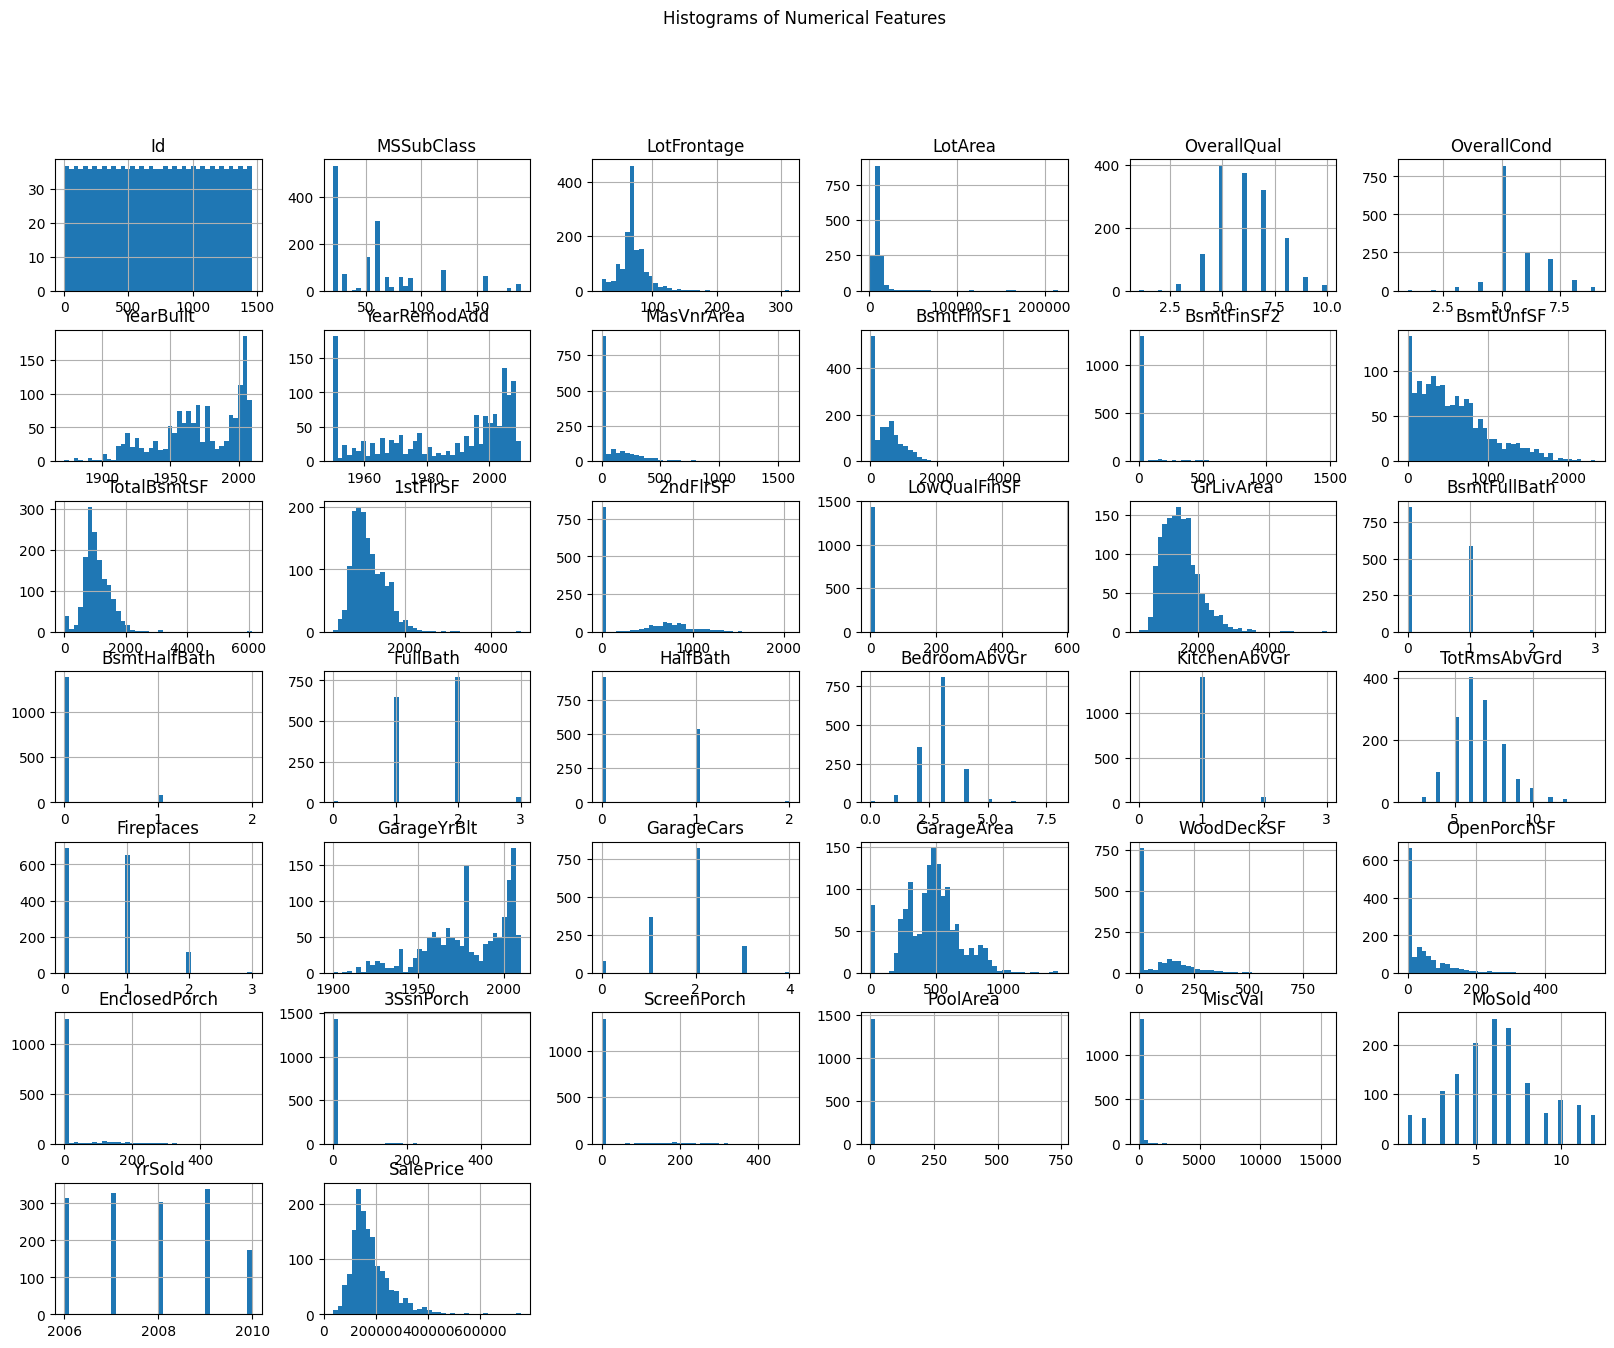

In [35]:
# Exploratory Data Analysis
train_df.hist(bins=40, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()

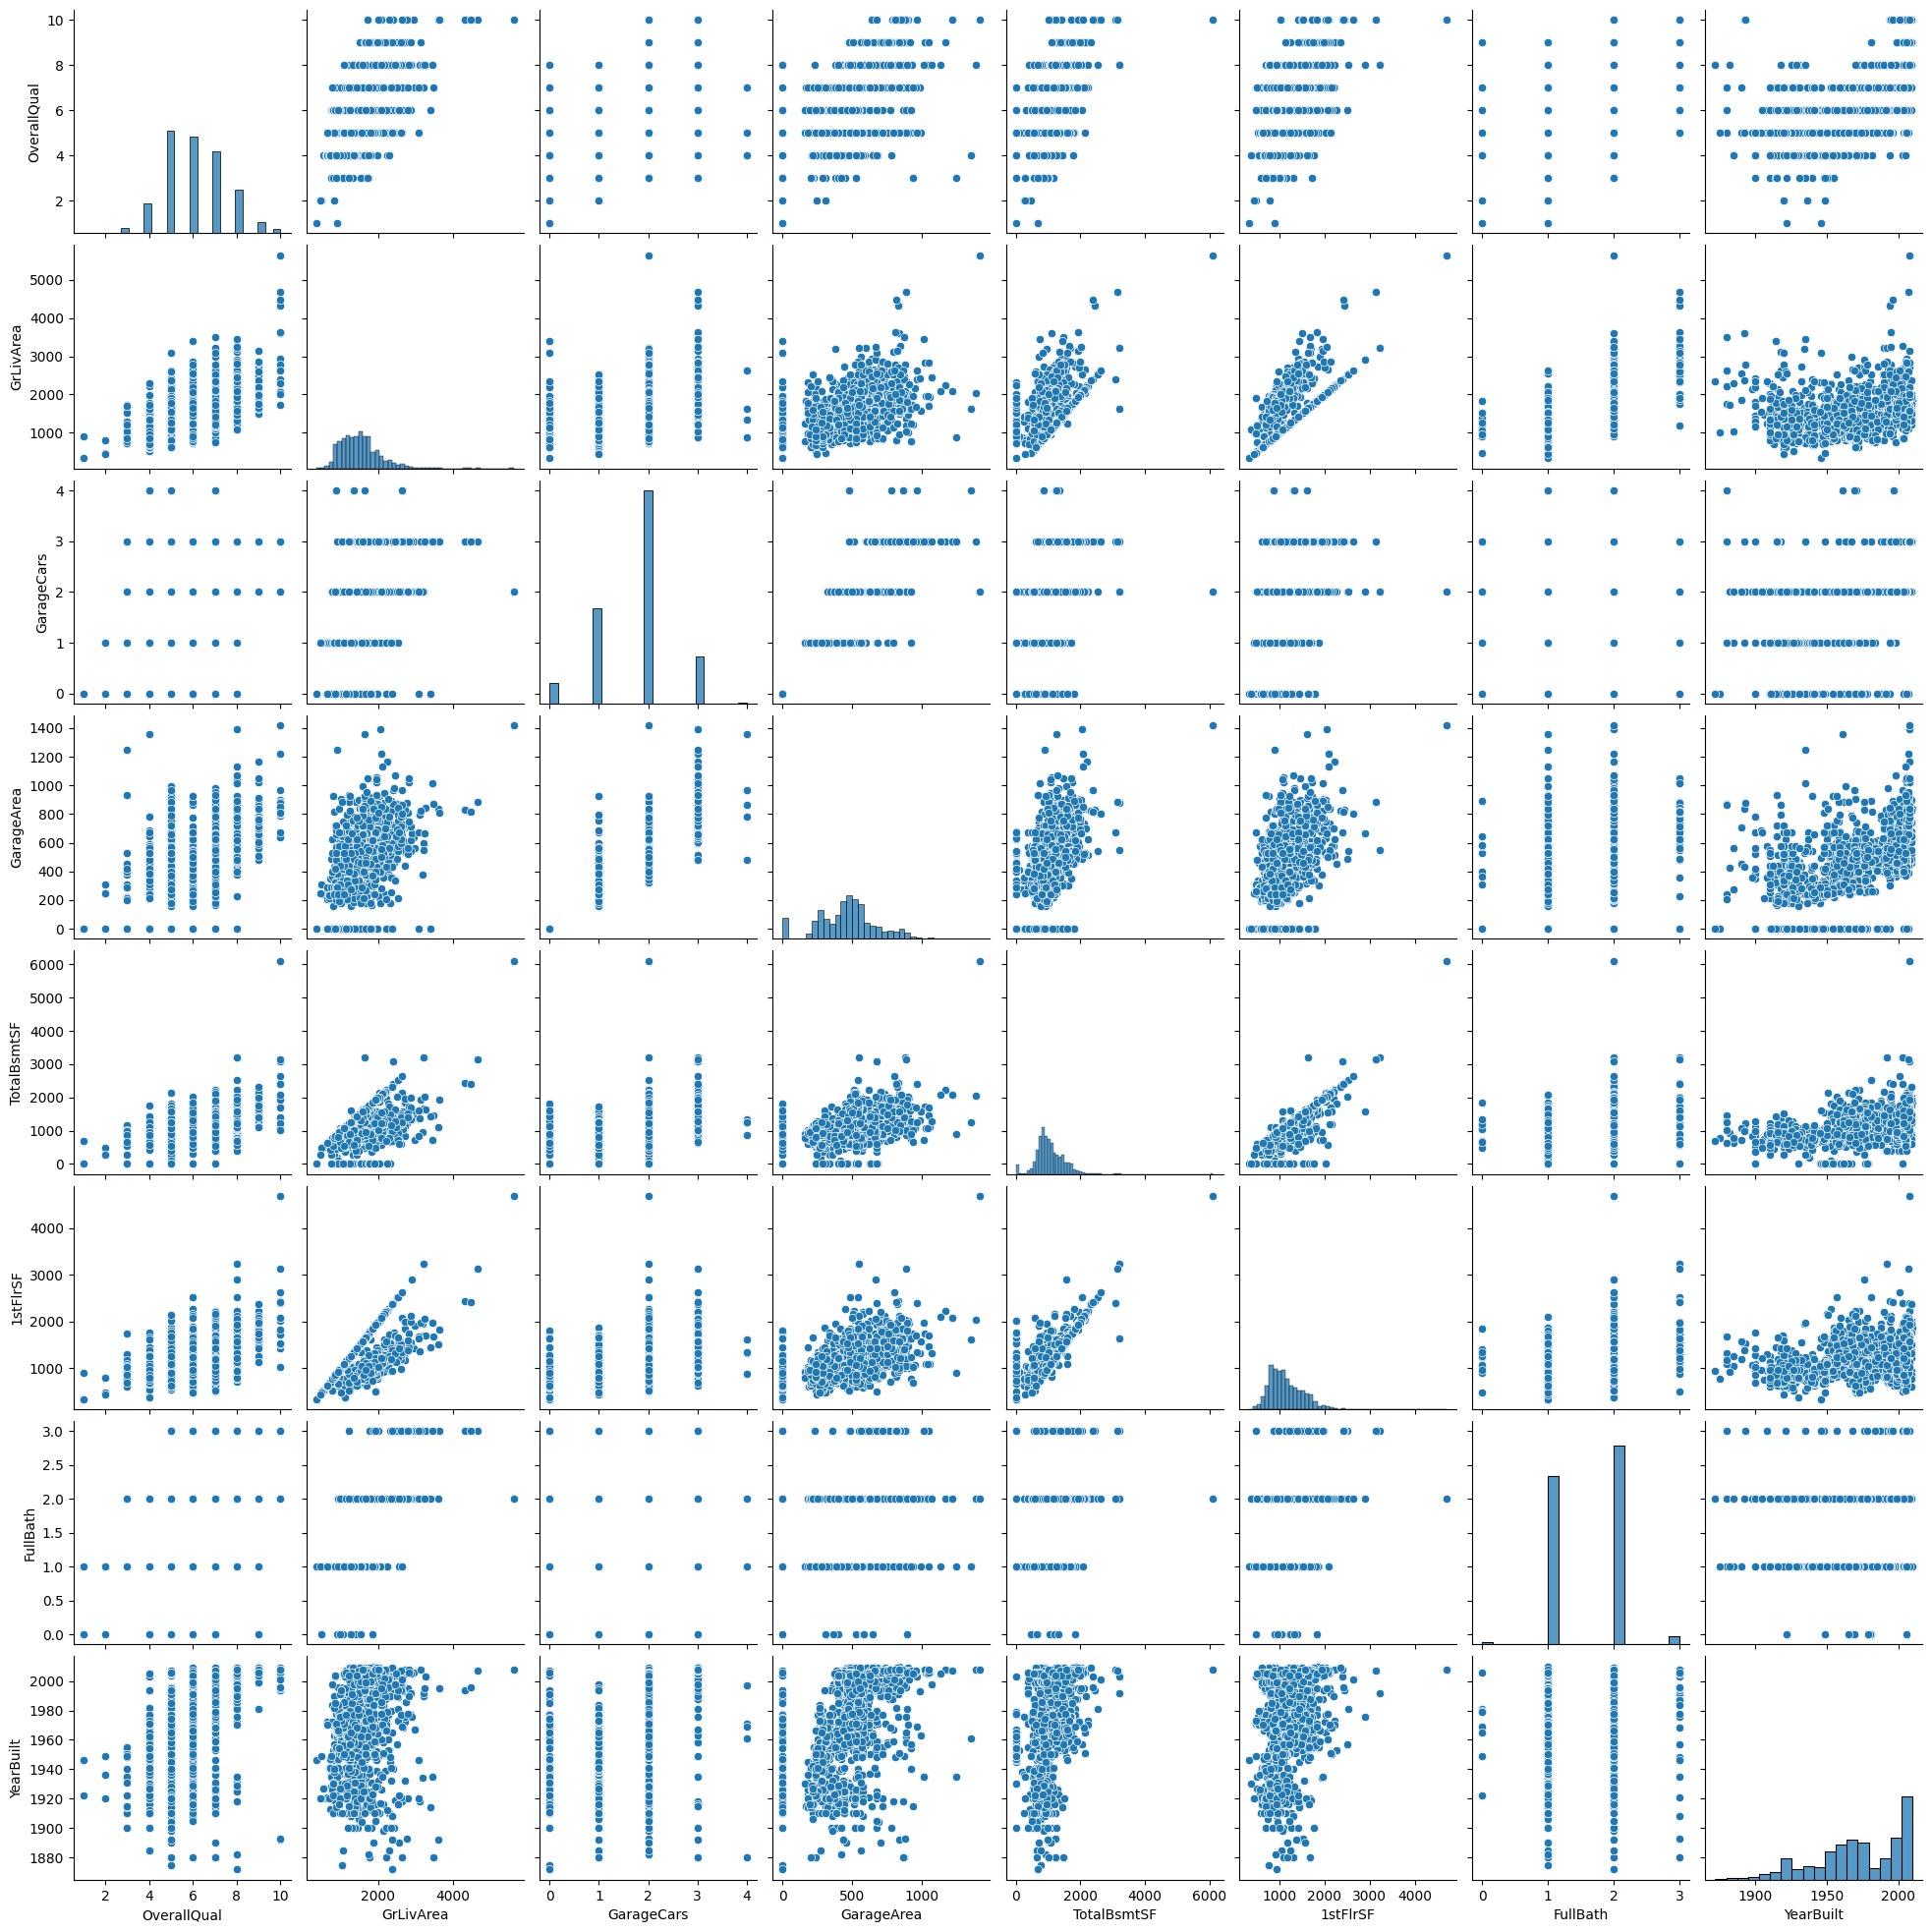

In [36]:
# Scatter matrix for selected features
selected_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "YearBuilt"]
sns.pairplot(train_df[selected_features])
plt.show()

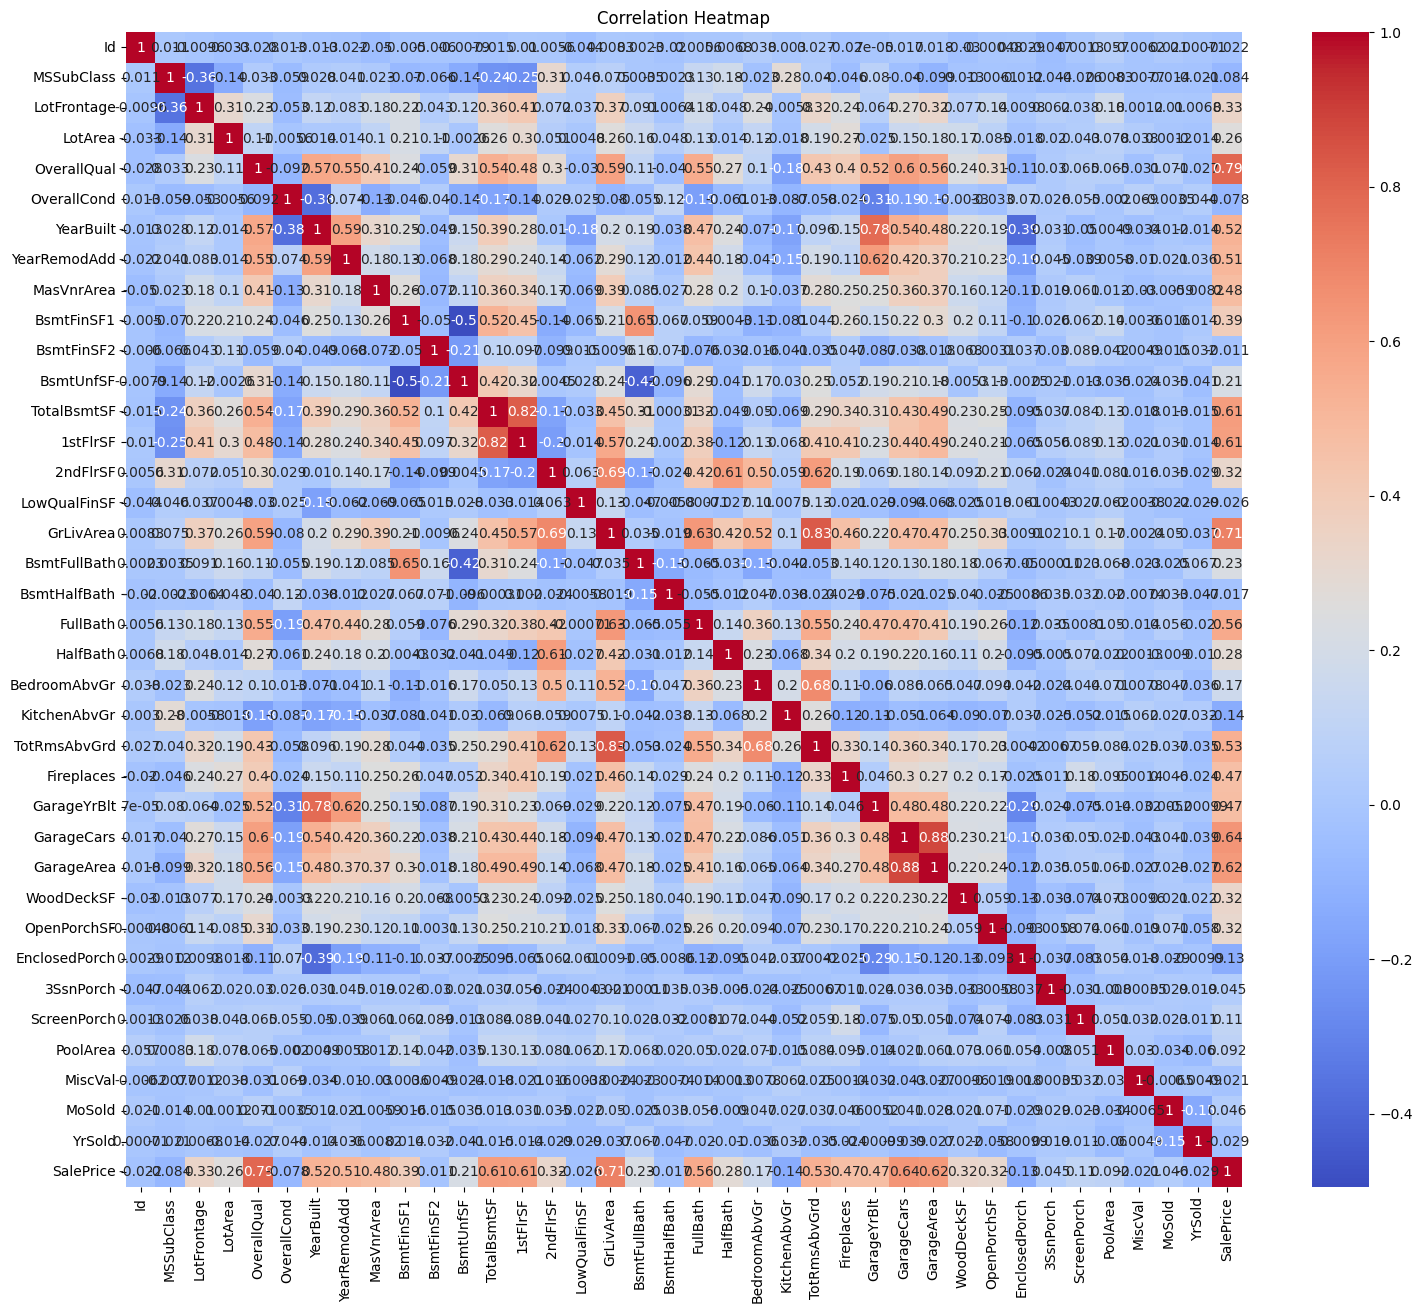

In [37]:
# Correlation matrix
plt.figure(figsize=(18, 15))
correlation_matrix = train_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [38]:
# Identify highly correlated features
correlation_threshold = 0.8
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [col for col in upper_tri.columns if any(upper_tri[col] > correlation_threshold)]
print("Highly correlated features to drop:", high_corr_features)

Highly correlated features to drop: ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']


In [39]:
# Drop highly correlated features and ID columns
train_df = train_df.drop(columns=high_corr_features + ['Id'], axis=1)
test_df = test_df.drop(columns=high_corr_features + ['Id'], axis=1)

In [40]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in train_cat_columns:
    if col in train_df.columns:
        train_df[col] = label_encoder.fit_transform(train_df[col].astype(str))

for col in test_cat_columns:
    if col in test_df.columns:
        test_df[col] = label_encoder.fit_transform(test_df[col].astype(str))

In [41]:
# Splitting data into features and target variable
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']
X_test = test_df

In [42]:
# Train a regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predictions on the training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [44]:
# Evaluate model performance
mse = mean_squared_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)
print("Mean Squared Error (MSE) on training data:", mse)
print("R-Squared Value on training data:", r2)

Mean Squared Error (MSE) on training data: 918309901.572857
R-Squared Value on training data: 0.8543934223978753


In [45]:
# Output predictions
predicted_prices = pd.DataFrame({'Predicted House Prices': test_predictions})
print(predicted_prices.head())

   Predicted House Prices
0           184226.208214
1           237862.446358
2           248980.883346
3           258653.927989
4           267849.949340


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import classification_report

# Load zero-shot classification model
model_name = "valhalla/distilbart-mnli-12-6"  # Lightweight and fast model
classifier = pipeline("zero-shot-classification", model=model_name, batch_size=32)

# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/ganesh1616/Ganesh_INFO5731_Fall2024/main/movie_reviews.csv")

# Check dataset columns
print("Dataset Columns:", data.columns)

# Extract text and sentiment columns
texts = data["Review"].tolist()
true_labels = data["Sentiment"].tolist()

# Inspect unique labels
print("Unique Sentiment Labels in Dataset:", set(true_labels))

# Define candidate labels
candidate_labels = ["positive", "negative", "neutral"]

# Filter rows with valid labels only
valid_labels = set(candidate_labels)
valid_indices = [i for i, label in enumerate(true_labels) if label.lower() in valid_labels]

# If valid_indices is empty, it means no labels matched
if not valid_indices:
    raise ValueError("No matching labels found. Check the dataset for valid sentiment labels.")

# Filter valid texts and labels
texts = [texts[i] for i in valid_indices]
true_labels = [true_labels[i].lower() for i in valid_indices]  # Convert to lowercase for consistency

# Perform zero-shot sentiment analysis
predictions = classifier(texts, candidate_labels)

# Extract predicted labels
predicted_labels = [pred["labels"][0] for pred in predictions]

# Evaluate performance
report = classification_report(
    true_labels, predicted_labels, target_names=candidate_labels, digits=3
)

print(report)


Dataset Columns: Index(['Review', 'Sentiment'], dtype='object')
Unique Sentiment Labels in Dataset: {'Negative', 'Neutral', 'Positive'}
              precision    recall  f1-score   support

    positive      0.198     0.950     0.328        20
    negative      0.000     0.000     0.000        38
     neutral      0.776     0.581     0.664       167

    accuracy                          0.516       225
   macro avg      0.325     0.510     0.331       225
weighted avg      0.594     0.516     0.522       225

